# Monthly Data
- 호주 당뇨병 치료약(anti-diabetic) 월별 Sales 데이터 사용 예정 
https://raw.githubusercontent.com/selva86/datasets/master/a10.csv
- 모든 회사에 있는 월별 매출, 가입자, 등 실적 데이터에 활용

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

- 데이터 불러오기. plottig. 

- 계절요인 분리. Trend, Seasonl, residual을 포함하는 테이블 생성. 
- Insight 도출
  1. 월평균 성장율 
  2. Seasonal 요소 분석
  3. residual 증감 여부 

In [ ]:
# plot할때 warning message가 난다면, 아래 명령어로 matplotlib 버전을 3.0.3으로 낮춰주세요.
# colab에 설치된 matplotlib은 2020년4월 기준으로 3.2.1 입니다. 
! pip install matplotlib==3.0.3

# 설치된 matplotlib 버전을 확인하려면 아래를 실행하세요.
import matplotlib
matplotlib.__version__

In [1]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/a10.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


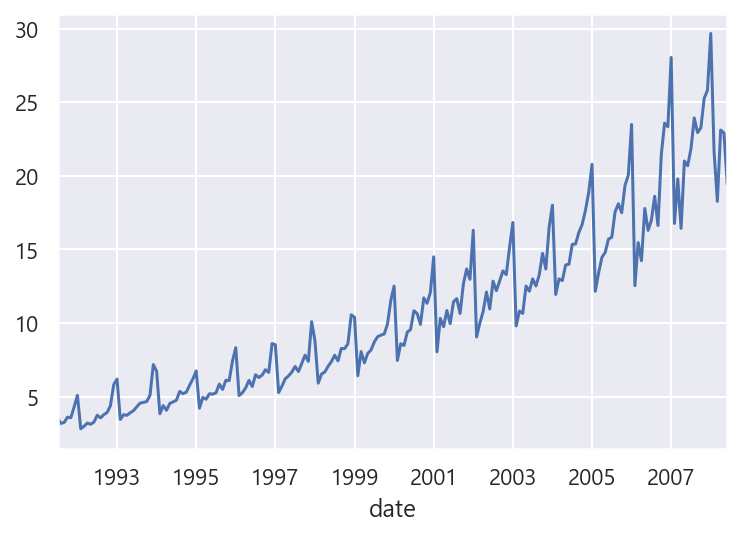

In [2]:
df.value.plot()

In [3]:
df=df[df.index>'1999-12-31']

In [9]:
result= seasonal_decompose(df, model='additive', two_sided=False)
# two_sided 앞에 12개월 버림

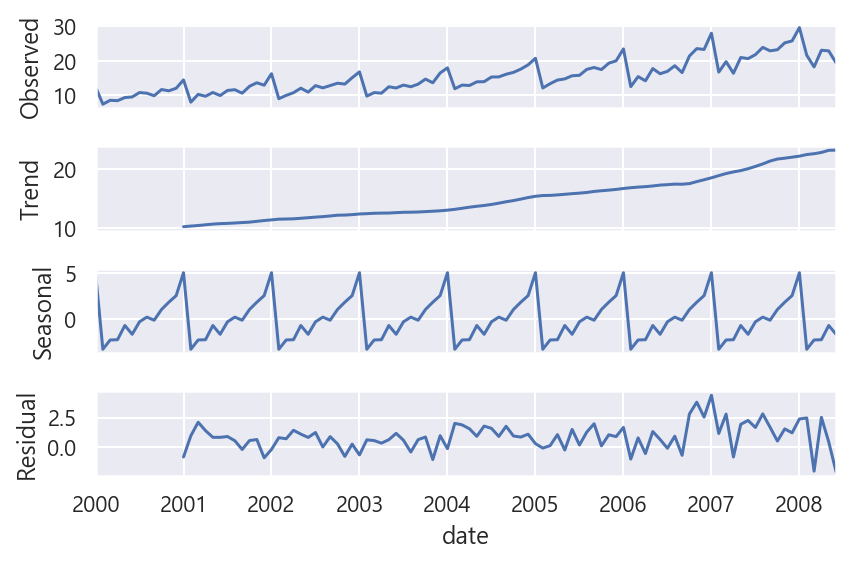

In [10]:
result.plot()
plt.show()

In [11]:
df_re = pd.concat([result.observed, result.trend, result.seasonal, result.resid], axis=1)

In [12]:

df_re.columns = ['obs', 'trend', 'seasonal', 'resid']
df_re.dropna(inplace=True)


In [13]:
df_re.head(20)
df_re['year']=df_re.index.year


In [14]:
df_re.head()

,obs,trend,seasonal,resid,year
date,,,,,
2001-01-01,14.497581,10.290804,5.061367,-0.854590,2001
2001-02-01,8.049275,10.398229,-3.307973,0.959019,2001
2001-03-01,10.312891,10.494636,-2.293969,2.112225,2001
2001-04-01,9.753358,10.619680,-2.264396,1.398075,2001
2001-05-01,10.850382,10.733969,-0.711368,0.827781,2001


###  2006년 2007년 에는 ordinary한 cycle에서 벗어나는 경향을 보였다,

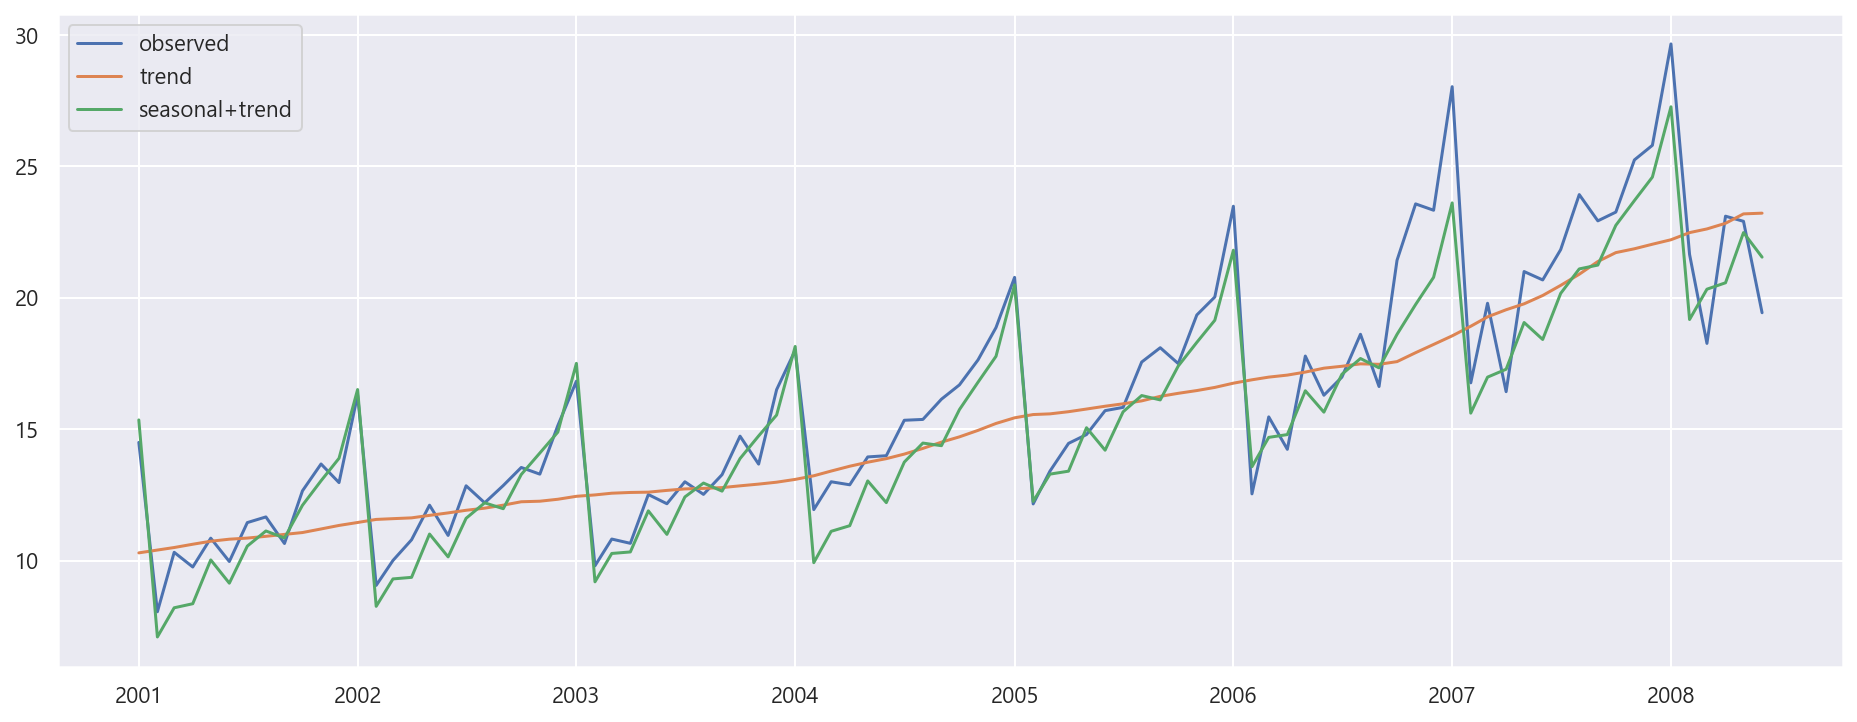

In [15]:
plt.figure(figsize=(16,6))
plt.plot(df_re.obs)
plt.plot(df_re.trend)
plt.plot(df_re.seasonal+df_re.trend)
plt.legend(['observed', 'trend', 'seasonal+trend'])
plt.show()

In [16]:
df_re.index[0]
def get_date(date):
    return str(date.year)+'-'+str(date.month)

In [17]:
get_date(df_re.index[0])

'2001-1'

[Text(0, 0, '2001-1'),
 Text(0, 0, '2001-2'),
 Text(0, 0, '2001-3'),
 Text(0, 0, '2001-4'),
 Text(0, 0, '2001-5'),
 Text(0, 0, '2001-6'),
 Text(0, 0, '2001-7'),
 Text(0, 0, '2001-8'),
 Text(0, 0, '2001-9'),
 Text(0, 0, '2001-10'),
 Text(0, 0, '2001-11'),
 Text(0, 0, '2001-12'),
 Text(0, 0, '2002-1'),
 Text(0, 0, '2002-2'),
 Text(0, 0, '2002-3'),
 Text(0, 0, '2002-4'),
 Text(0, 0, '2002-5'),
 Text(0, 0, '2002-6'),
 Text(0, 0, '2002-7'),
 Text(0, 0, '2002-8'),
 Text(0, 0, '2002-9'),
 Text(0, 0, '2002-10'),
 Text(0, 0, '2002-11'),
 Text(0, 0, '2002-12'),
 Text(0, 0, '2003-1'),
 Text(0, 0, '2003-2'),
 Text(0, 0, '2003-3'),
 Text(0, 0, '2003-4'),
 Text(0, 0, '2003-5'),
 Text(0, 0, '2003-6'),
 Text(0, 0, '2003-7'),
 Text(0, 0, '2003-8'),
 Text(0, 0, '2003-9'),
 Text(0, 0, '2003-10'),
 Text(0, 0, '2003-11'),
 Text(0, 0, '2003-12'),
 Text(0, 0, '2004-1'),
 Text(0, 0, '2004-2'),
 Text(0, 0, '2004-3'),
 Text(0, 0, '2004-4'),
 Text(0, 0, '2004-5'),
 Text(0, 0, '2004-6'),
 Text(0, 0, '2004-7'),
 T

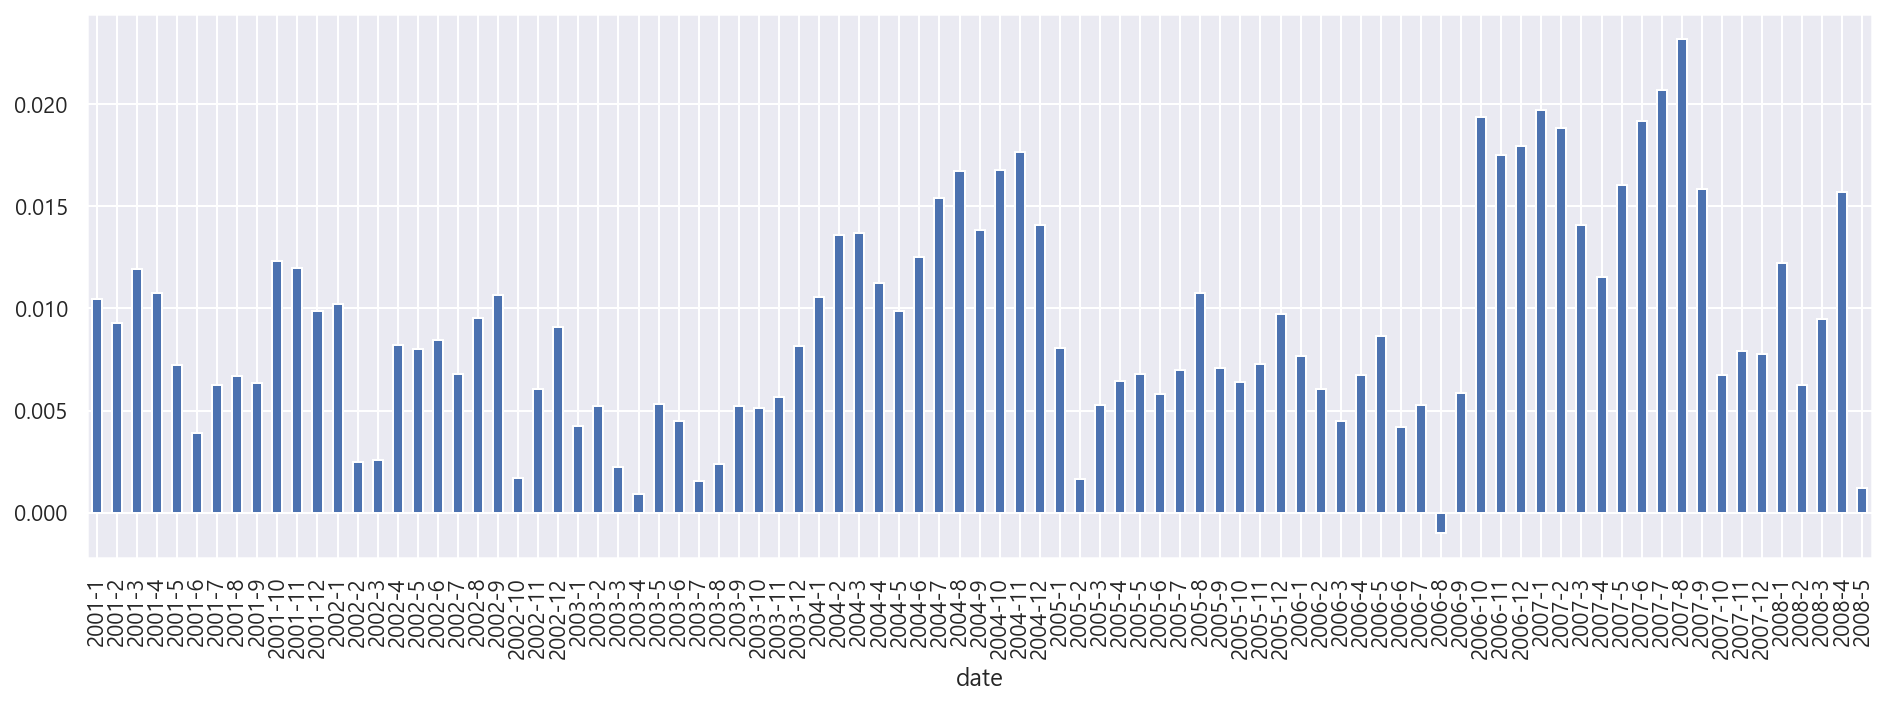

In [18]:
#trend
ax= df_re.trend.pct_change().dropna().plot(kind='bar', figsize=(16,5))
ax.set_xticklabels(list(map(lambda x: get_date(x), df_re.index)))

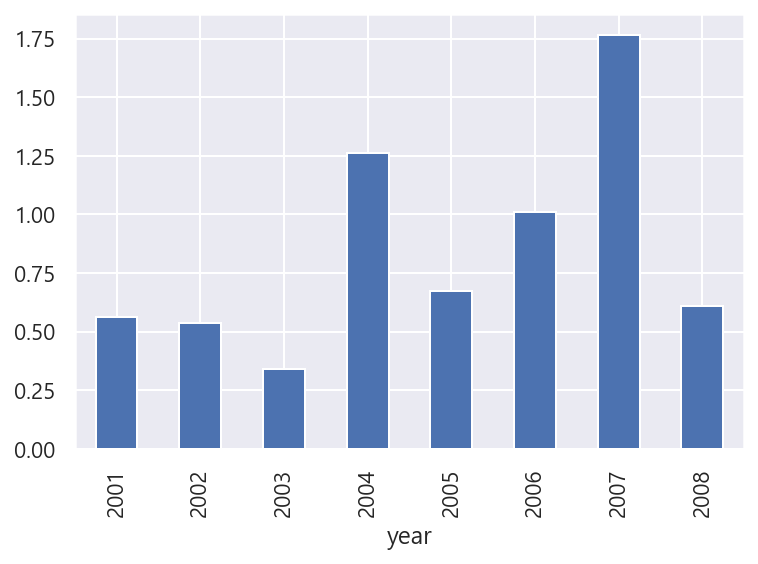

In [19]:
# residual : unexpected 값들
df_re.groupby('year')['resid'].mean().plot(kind='bar')
plt.show()

### 시계열 데이터 
- 계절 요인 

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/sm-joo/sm-joo/master/DEXKOUS.csv", parse_dates=['DATE'], index_col='DATE')

In [39]:
df.head()

,DEXKOUS
DATE,
2015-03-13,1135.7
2015-03-16,1129.62
2015-03-17,1127.69
2015-03-18,1127.09
2015-03-19,1121.21


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
DEXKOUS    1306 non-null object
dtypes: object(1)
memory usage: 20.4+ KB


In [41]:
df.columns= ['KDUS']

In [42]:
df['KDUS'].replace('.', '', inplace=True)

In [43]:
df['KDUS'] = pd.to_numeric(df['KDUS'])

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
KDUS    1251 non-null float64
dtypes: float64(1)
memory usage: 20.4 KB


In [45]:
df['KDUS'].fillna(method='ffill', inplace=True)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1306 entries, 2015-03-13 to 2020-03-13
Data columns (total 1 columns):
KDUS    1306 non-null float64
dtypes: float64(1)
memory usage: 20.4 KB


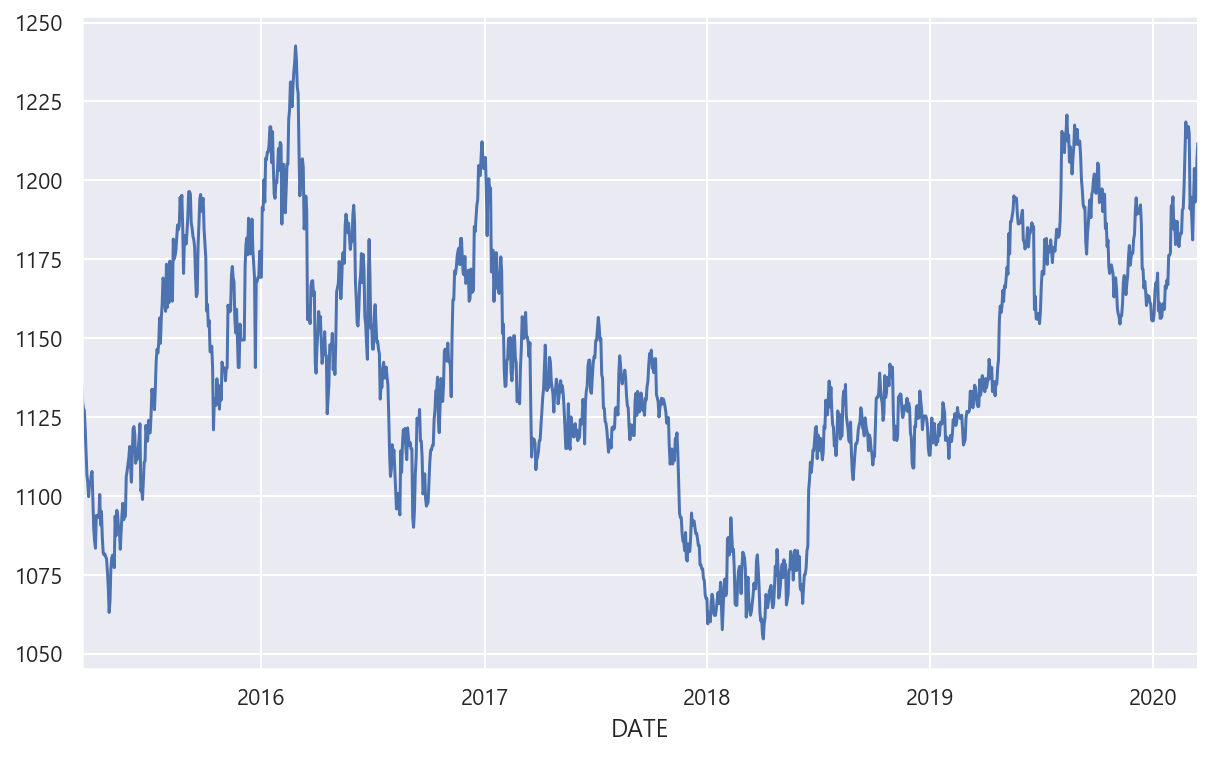

In [47]:
df['KDUS'].plot(figsize=(10,6))
plt.show()

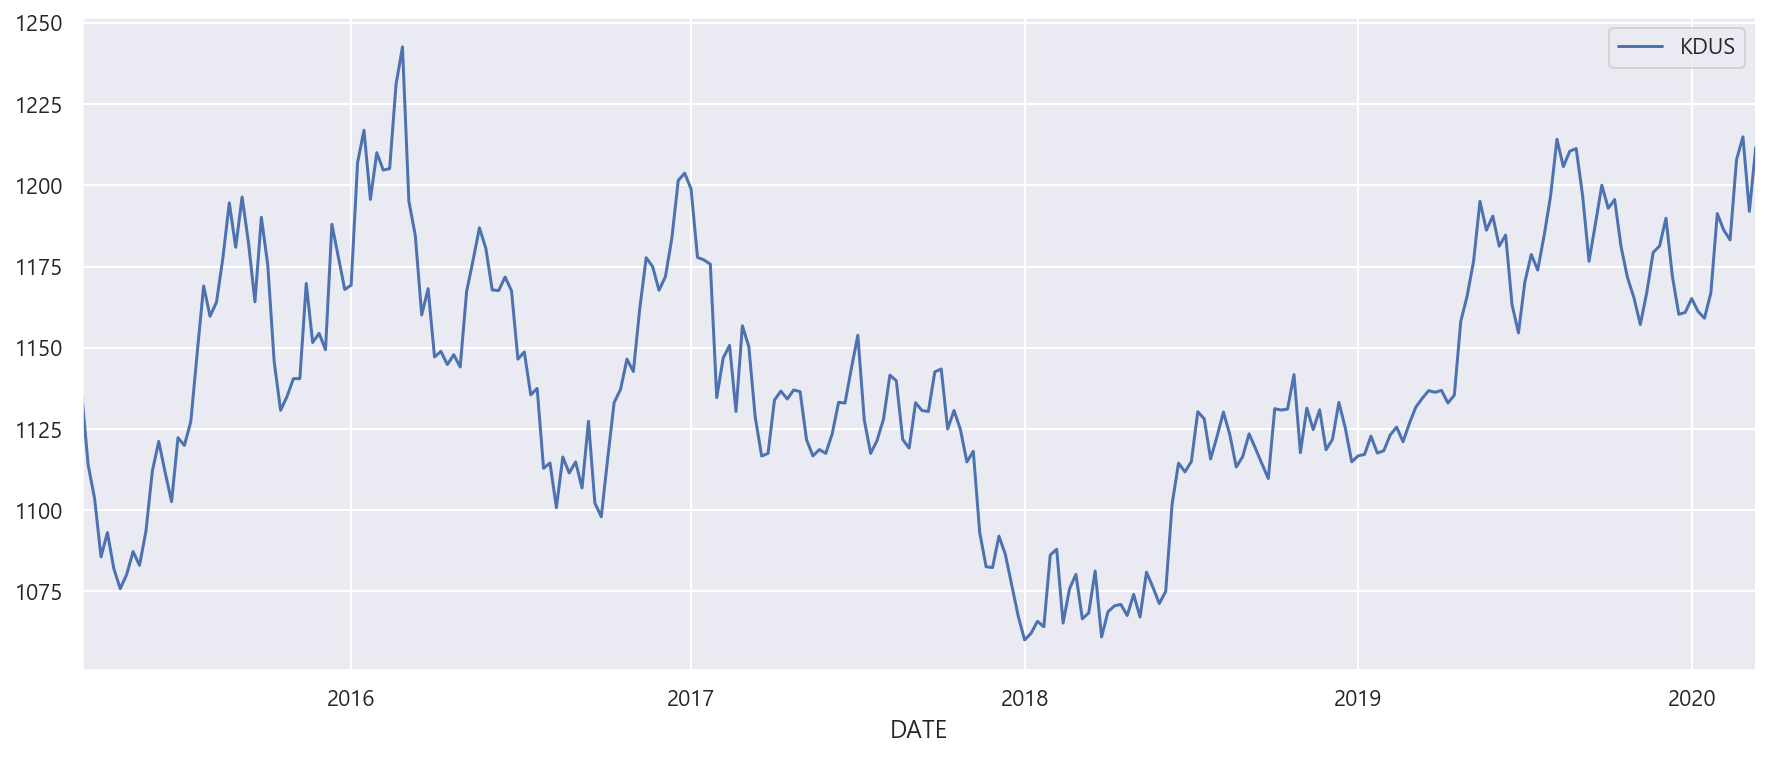

In [51]:
# resample : 일별데이터 -> 주단위 데이터, 월단위 데이터로 변환
df.resample('M').last()
df.resample('W-Fri').last().plot(figsize=(15,6))

,KDUS
DATE,
2015-03-13,NaN
2015-03-16,NaN
2015-03-17,NaN
2015-03-18,NaN
2015-03-19,NaN
2015-03-20,NaN
2015-03-23,NaN
2015-03-24,NaN
2015-03-25,NaN


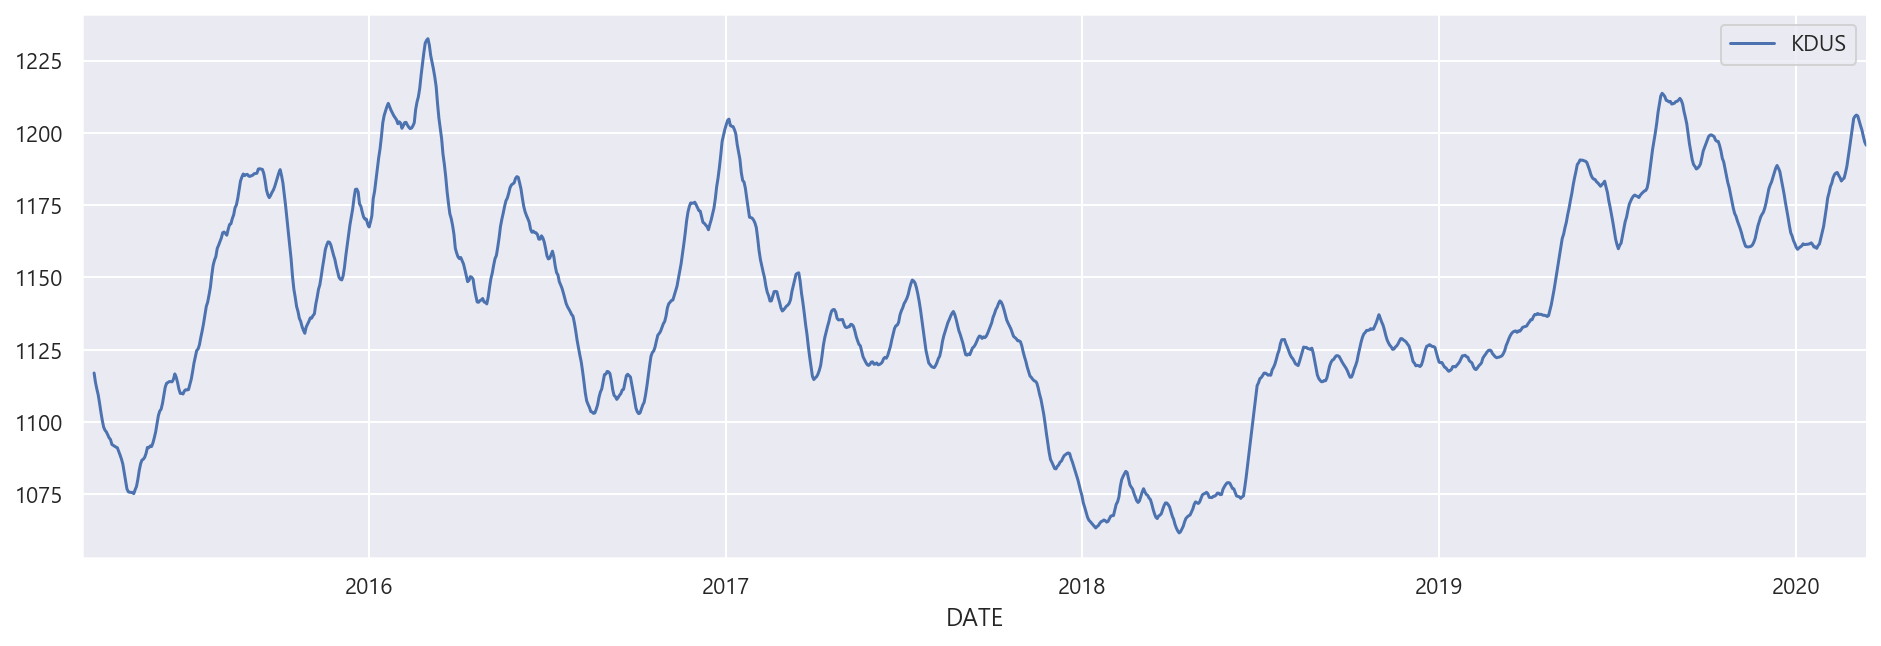

In [58]:
# rolling : 이전 xx일에 대한 이동평균, 이동 sum을 산출할때 사용
display(df.rolling(10).mean().head(20))
df.rolling(10).mean().plot(figsize=(16,5))

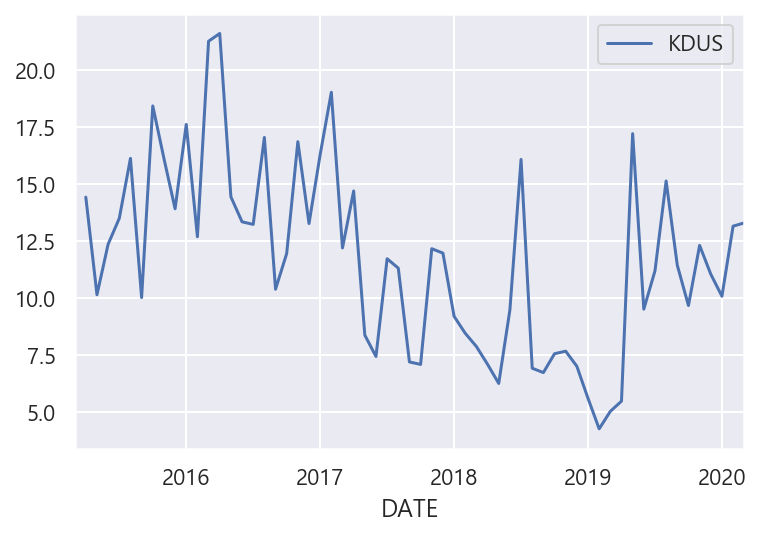

In [69]:
df.rolling(30).std().resample('M').mean().plot()

### 안전성 검정
 - 귀무가설=안정적이지 않다
 - p-value가 0.05보다 작으면, 귀무가설 기각, 즉 안정적인 시계열
 - p-value가 0.05보다 크면, 귀무가설 채택 즉 불안정한 시계열
 - 안정적인 데이터로 변경 : 변화율/로그차분

In [72]:
adfuller(df['KDUS'])

(-2.6235188039221153,
 0.0882331757572502,
 0,
 1305,
 {'1%': -3.4353708501743654,
  '5%': -2.8637572934525286,
  '10%': -2.56795049999266},
 8358.34690710183)

In [75]:
#y(t+1)/y(t)-1
#log(y(t+1))-log(y(t))
adfuller(df.KDUS.pct_change().dropna())
df.KDUS.pct_change().dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KDUS, Length: 1305, dtype: float64

In [80]:
(df.KDUS/df.KDUS.shift(1)-1).dropna()

DATE
2015-03-16   -0.005354
2015-03-17   -0.001709
2015-03-18   -0.000532
2015-03-19   -0.005217
2015-03-20   -0.006546
                ...   
2020-03-09    0.009857
2020-03-10   -0.008847
2020-03-11    0.000888
2020-03-12    0.010074
2020-03-13    0.004568
Name: KDUS, Length: 1305, dtype: float64

In [81]:
# 로그 차분
np.log(df.KDUS)-np.log(df.KDUS.shift(1)).dropna()


DATE
2015-03-13         NaN
2015-03-16   -0.005368
2015-03-17   -0.001710
2015-03-18   -0.000532
2015-03-19   -0.005231
                ...   
2020-03-09    0.009809
2020-03-10   -0.008887
2020-03-11    0.000888
2020-03-12    0.010024
2020-03-13    0.004558
Name: KDUS, Length: 1306, dtype: float64